In [32]:
import os
import pandas as pd

working_dir = os.getcwd()

df = pd.DataFrame(pd.read_csv(os.path.join(working_dir, 'breaking_distance.csv')))
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [33]:
from sklearn.model_selection import train_test_split

X = df['speed']
y = df['dist']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

275.42898287742366 16.59605323194113 0.6157734182280233


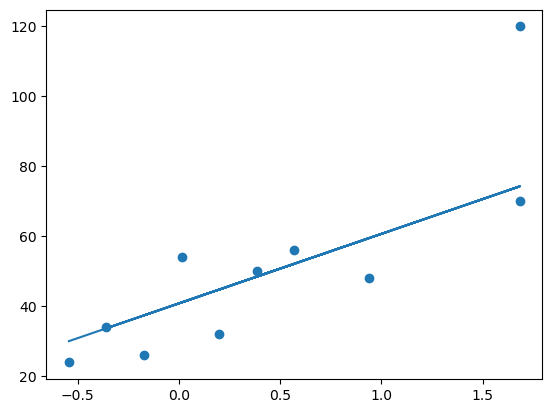

In [35]:
# linear
from sklearn.linear_model import LinearRegression

model_lin = LinearRegression()
model_lin.fit(X_train_scaled, y_train)
lin_pred = model_lin.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse_lin = mean_squared_error(y_test, lin_pred)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, lin_pred)

print(mse_lin, rmse_lin, r2_lin)

import matplotlib.pyplot as plt

plt.scatter(X_test_scaled, y_test)
plt.plot(X_test_scaled, lin_pred)

237.25352092874368 14.668032019884754 0.4771054506857726


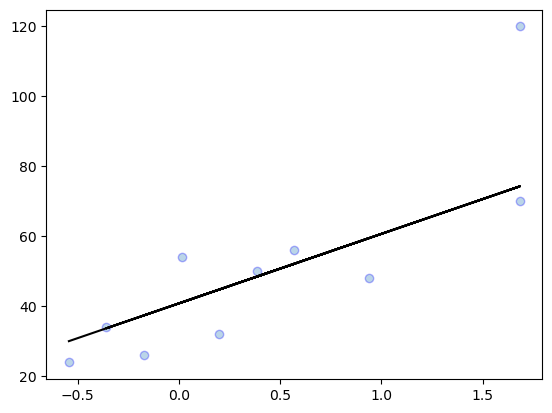

In [36]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np

model_lin_cross = LinearRegression()
model_lin_cross.fit(X_train_scaled, y_train)
pred_model_lin_cross = model_lin_cross.predict(X_test_scaled)

kf = KFold(n_splits=5, shuffle=True, random_state=1)
scores_lin = cross_val_score(model_lin_cross, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=kf)

mse_scores_lin = -scores_lin
rmse_scores_lin = np.sqrt(mse_scores_lin)
r2_scores_lin = cross_val_score(model_lin_cross, X_train_scaled, y_train, scoring='r2', cv=kf)

mean_rmse_in = np.mean(rmse_scores_lin)
std_rmse_lin = np.std(rmse_scores_lin)

print(mse_scores_lin.mean(), mean_rmse_in, r2_scores_lin.mean())

plt.scatter(X_test_scaled, y_test, alpha=0.3, edgecolors='b')
plt.plot(X_test_scaled, pred_model_lin_cross, color='k')


Text(0, 0.5, 'Breaking Distance')

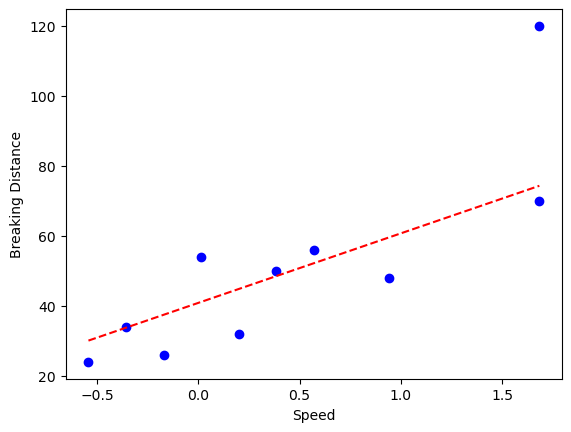

In [37]:
# another way to get regression line

X_test_feature = X_test_scaled[:, 0]
X_range_feature = np.linspace(X_test_feature.min(), X_test_feature.max(), 100).reshape(-1, 1)
y_range_pred = model_lin.predict(X_range_feature)

plt.scatter(X_test_feature, y_test, color='blue', label='Actual values') # actual x predicted
plt.plot(X_range_feature, y_range_pred, color='red', linestyle='--', label='Regression line') # regression line

plt.xlabel('Speed')
plt.ylabel('Breaking Distance')
# plt.title('')
# plt.legend()

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

rf_mse, rf_rmse, rf_r2

(342.91010431870734, 18.51783206314139, 0.5216364818945547)

277.6103, (135.42788337514716, 16.661641515977248, 0.48488550602451513)


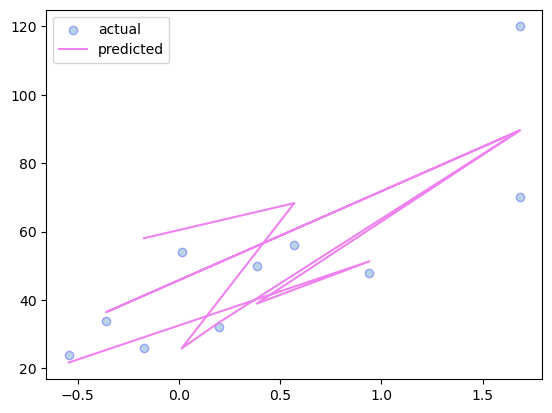

In [67]:
# see performance of cross validation

kf_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
kf_rf_model.fit(X_train_scaled, y_train)
kf_rf_model_pred = kf_rf_model.predict(X_test_scaled)

rf_kf = KFold(n_splits=5, shuffle=True, random_state=42)

kf_rf_cross_mse = cross_val_score(kf_rf_model, X_train_scaled, y_train, cv=rf_kf, scoring='neg_mean_squared_error')
kf_rf_cross_r2 = cross_val_score(kf_rf_model, X_train_scaled, y_train, cv=rf_kf, scoring='r2')

kf_rf_cross_mse_mean = -kf_rf_cross_mse.mean()

print(f"{kf_rf_cross_mse_mean:.4f}, {kf_rf_cross_mse.std(), np.sqrt(kf_rf_cross_mse_mean), kf_rf_cross_r2.mean()}")

plt.scatter(X_test_scaled, y_test, alpha=0.3, edgecolors='b', label='actual')
plt.plot(X_test_scaled, kf_rf_model_pred, color='violet', label='predicted')
plt.legend()

Text(0, 0.5, 'Breaking Distance')

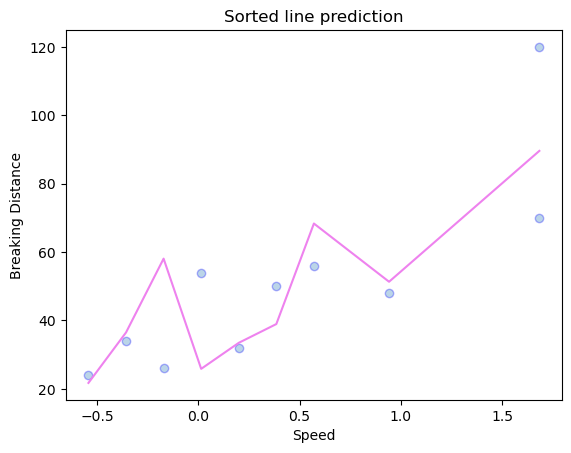

In [68]:
# smoother plot, visualize prediction
kf_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
kf_rf_model.fit(X_train_scaled, y_train)

kf_rf_features = kf_rf_model.predict(X_test_scaled)

sorted_indices = np.argsort(X_test_scaled[:, 0])
sorted_X_test_scaled = X_test_scaled[sorted_indices]
sorted_kf_rf_features = kf_rf_features[sorted_indices]

plt.scatter(X_test_scaled[:, 0], y_test, alpha=0.3, edgecolors='b')
plt.plot(sorted_X_test_scaled[:, 0], sorted_kf_rf_features, color='violet')
plt.title('Sorted line prediction')
plt.xlabel('Speed')
plt.ylabel('Breaking Distance')

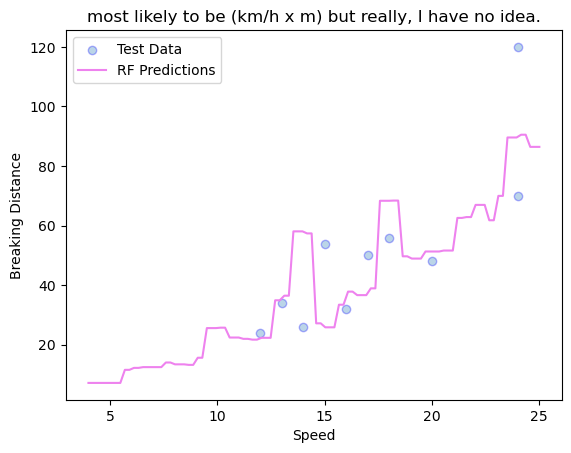

In [59]:
#smoother plot for RF, unscaled values

# Generate a range of scaled values for smoother plot
x_range_scaled = np.linspace(X_train_scaled.min(), X_train_scaled.max(), 100).reshape(-1, 1)
smoothed_predictions = kf_rf_model.predict(x_range_scaled)

# Inverse transform to get actual values[not scaled] on the graphs
x_range = scaler.inverse_transform(x_range_scaled)
X_test_unscaled = scaler.inverse_transform(X_test_scaled)

plt.scatter(X_test_unscaled, y_test, alpha=0.3, edgecolors='b', label='Test Data')
plt.plot(x_range, smoothed_predictions, color='violet', label='RF Predictions')
plt.xlabel('Speed')
plt.ylabel('Breaking Distance')
plt.title('most likely to be (km/h x m) but really, I have no idea.')
plt.legend()
plt.show()

In [ ]:
print(f"{1.321321321:.4f}")

1.3213
